## <p style='text-align:center'><font color = yellow> Chapter 03 : Interpolation and Polynomial Approximation

### <b><font color = green|>I.) Taylor Polynomial

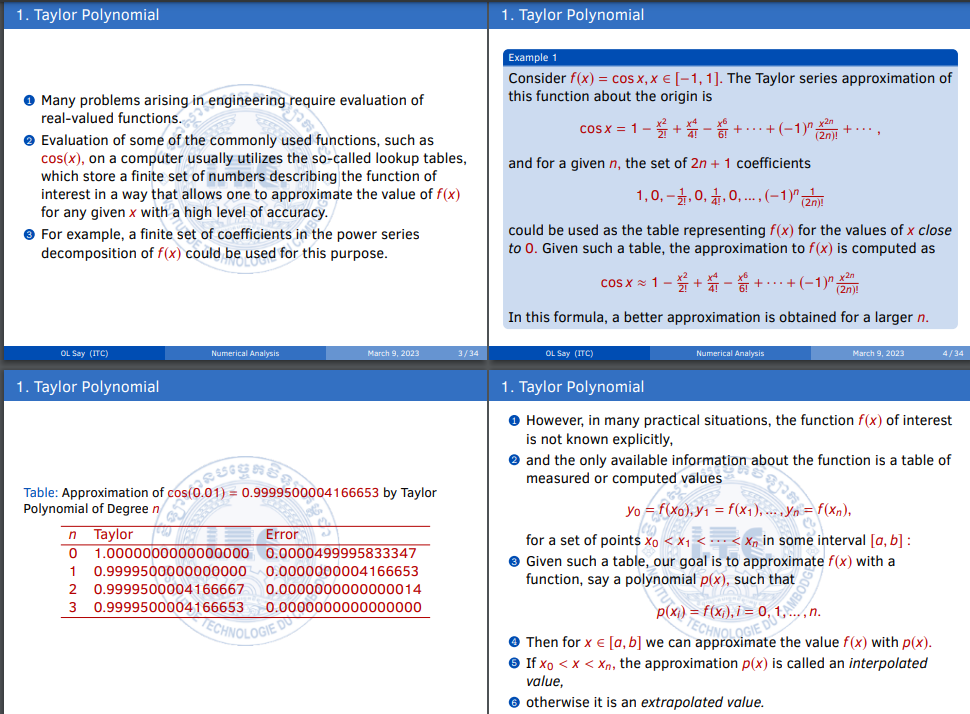 
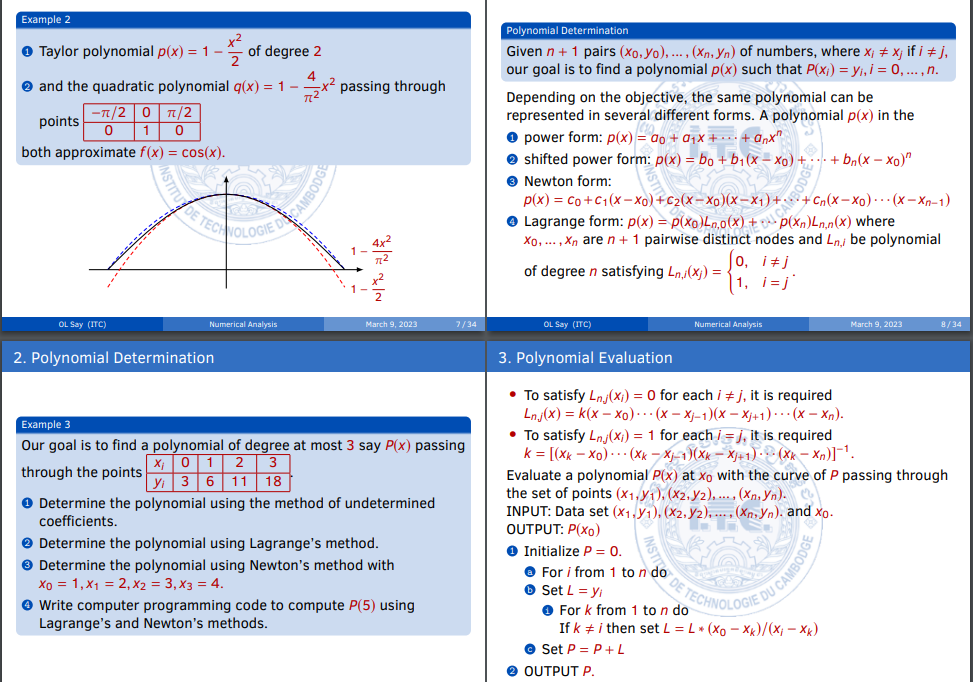

<font color = green|>

- $ Power\space form : f(x) = a_0 + a_1x + ... + a_nx^n $
- $ Shifted\space power\space form : f(x) = b_0 + b_1(x-x_0) + b_2(x-x_0)^2 + ... + b_n(x-x_0)^n $
- $ Newton\space form : f(x) = c_0x + c_1(x-x_0) + c_2(x-x_0)(x-x_1) + ... + c_n(x-x_0)(x-x_1)...(x-x_{n-1}) $
- $ Lagrange\space form : f(x) = p(x_0)L_{n,0}(x) + p(x_1)L_{n,1} + ... + p(x_n)L_{n,n}(x) $

#### <font color = green|>Example 01 :
$$ Approximate\space the\space rooot\space of\space cosx\space =\space 0 \space by\space using\space taylor\space polynomial $$

In [2]:
import math

def cos_taylor_approximation(x, n):
    approximation = 0.0
    sign = 1

    for i in range(n+1):
        numerator = math.pow(-1, i)
        denominator = math.factorial(2*i)
        term = numerator * math.pow(x, 2*i) / denominator

        approximation += sign * term
        sign *= -1
    return approximation

# Set the value of x and the maximum degree of the Taylor polynomial
x = 0.01
max_degree = 3

# Print the table header
print("Table: Approximation of cos(0.01) = 0.9999500004166653 by Taylor Polynomial of Degree n")
print("n\tTaylor\t\t\t\tError")

# Compute the Taylor series approximation for each degree and print the results
for degree in range(max_degree + 1):
    approximation = cos_taylor_approximation(x, degree)
    error = abs(approximation - 0.9999500004166653)
    print(f"{degree}\t{approximation}\t\t\t{error}")


Table: Approximation of cos(0.01) = 0.9999500004166653 by Taylor Polynomial of Degree n
n	Taylor				Error
0	1.0			4.999958333473664e-05
1	1.00005			9.999958333484216e-05
2	1.0000500004166668			0.0001000000000015433
3	1.0000500004166681			0.00010000000000287557


#### <font color = green|>Example 02 :
$$ Write\space the\space taylor\space form\space of\space each\space following\space function $$
$$ f(x) = ln(x+1) $$
$$ f(x) = cos(x) $$ 
$$ f(x) = sin(x) $$
$$ f(x) = ln(cos(x)+sin(x)) $$
$$ f(x) = e^x $$
$$ f(x) = e^{x-2} $$

In [3]:
from sympy import ln,series, symbols,cos,sin,exp
x = symbols('x')
f = ln(x+1)
taylor_form = series(f)
taylor_form

x - x**2/2 + x**3/3 - x**4/4 + x**5/5 + O(x**6)

In [4]:
f = cos(x)
series(f,)

1 - x**2/2 + x**4/24 + O(x**6)

In [5]:
f = sin(x)
series(f)

x - x**3/6 + x**5/120 + O(x**6)

In [6]:
f = ln(cos(x)+sin(x))
series(f)

x - x**2 + 2*x**3/3 - 2*x**4/3 + 2*x**5/3 + O(x**6)

In [7]:
f = exp(x)
series(f)

1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)

In [8]:
f = exp(x-2)
series(f)

exp(-2) + x*exp(-2) + x**2*exp(-2)/2 + x**3*exp(-2)/6 + x**4*exp(-2)/24 + x**5*exp(-2)/120 + O(x**6)

### <font color = green|><b>II.) Polynomial Evaluation

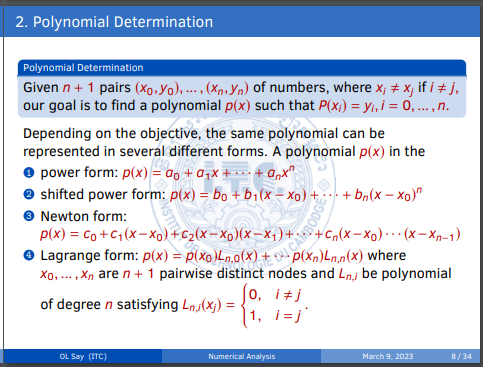 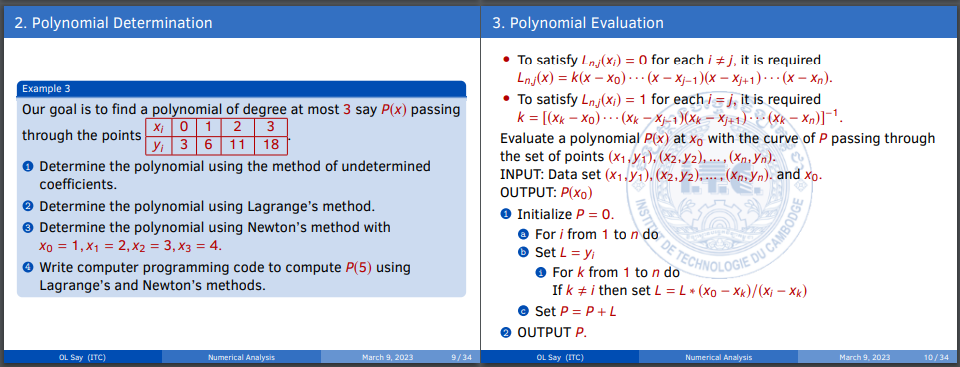 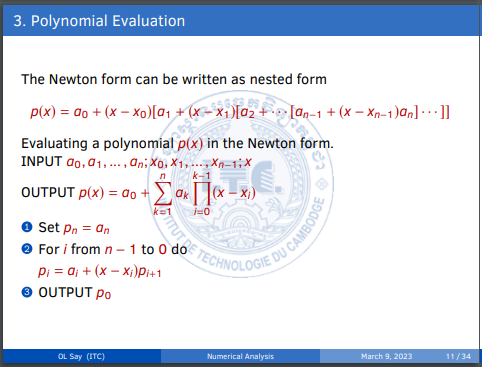

In [9]:
def EvaluatePolynomial(a: list[complex], x: complex) -> complex:
    N = len(a)
    n = N - 1
    p = a[n]
    for i in range(1, N, 1):
        p = a[n - i] + x * p
    return p


In [10]:
def DeflatePolynomial(a: list[complex], x: complex) -> list[complex]:
    n = len(a) - 1
    b = [(0 + 0j)] * n
    b[n - 1] = a[n]
    for k in range(n - 2, -1, -1):
        b[k] = a[k + 1] + x * b[k + 1]
    return b

In [11]:
def ShiftedPowerPOlynomial(a:list[complex],c:complex)->list[complex]:
    N = len(a)
    b = [0]*N
    b[0] = EvaluatePolynomial(a=a,x=c)
    for k in range(1,N,1):
        a[0] = a[0] - b[k-1]
        a = DeflatePolynomial(a=a,x=c)
        b[k] = EvaluatePolynomial(a=a,x=c)
    return b

if __name__ == "__main__":
    a = [2,3,-4,1]
    b = ShiftedPowerPOlynomial(a=a,c=2)
    print(a)
    print(b)
    print(EvaluatePolynomial(a=a,x=5))

[2, 3, -4, 1]
[0, -1, 2, 1]
42


<font color = yellow> Part 02

In [12]:
def EvaluatePolynomial2(a: list[complex], x: complex) -> tuple[complex, complex, complex]:
    N = len(a)
    n = N - 1
    p = a[n]
    dp = 0
    ddp = 0
    for i in range(1, N, 1):
        ddp = 2 * dp + x * ddp
        dp = p + x * dp
        p = a[n - i] + x * p
    return (p, dp, ddp)

if __name__ == "__main__":
    a = [1,2,3,4]
    x = 2
    print(EvaluatePolynomial2(a=a,x=x))

(49, 62, 54)


In [13]:
def PolyEval(a,x,d):
    N = len(a)
    n = N-1
    v = [0]* (d+1)
    v[0] = a[n]

    for k in range(1, N,1):
        for l in range(d,0,-1):
            v[l] = l*v[l-1]+ x * v[l]
        v[0] = a[n -k] + x * v[0]
    return  v

if __name__=="__main__":
    a = [1,2,3,4]
    x = 2
    v= PolyEval(a=a, x=x,d=4)
    print(a)
    print(x)
    print(v)

[1, 2, 3, 4]
2
[49, 62, 54, 24, 0]


### <b><font color = green|>III.) Lagrange Interpolation

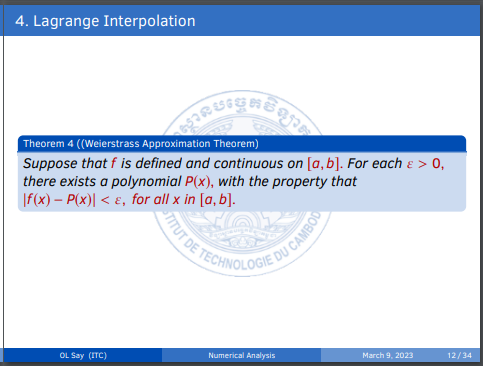 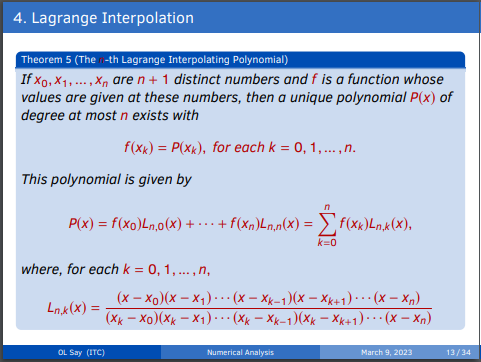 
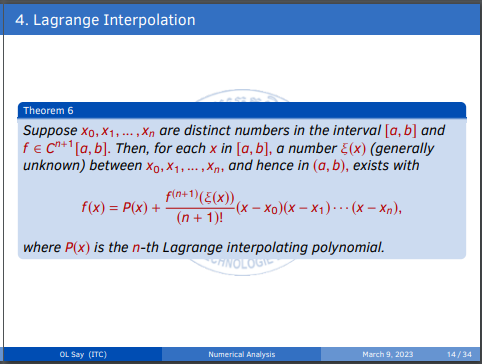 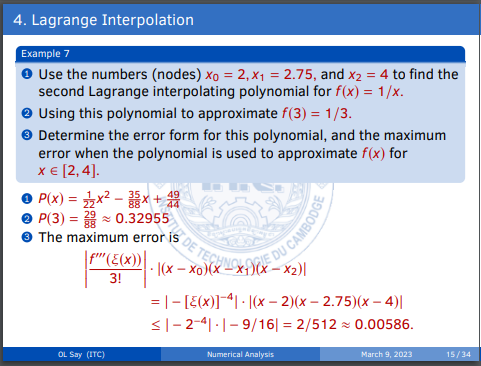

In [14]:
def EvaluateLagrangePolynomial( i : int, x: list[complex], z: complex) -> complex:
    L = 1
    stop  = len(x)
    for j in range (0, stop, 1):
        if (i != j):
            L = L *(z-x[j])/(x[i]-x[j])
    return L
if __name__=="__main__":
    i = 2
    x = [0,1,2,3]
    z = 4
    L = EvaluateLagrangePolynomial(i=i, x=x, z=z)
    print(L)

-6.0


In [15]:
def LagrangeInterpolation(x: list[complex], y:list[complex], z:complex) -> complex:
    N = len(x)
    p = 0
    for i in range(0, N, 1):
        p = p + y[i] * EvaluateLagrangePolynomial(i=i, x=x, z=z)
    return p

if __name__=="__main__":
    x = [0,1,2,3]
    y = [1,2,5,10]
    for xi in x:
        p = LagrangeInterpolation(x=x, y=y, z=xi)
        print(f"p({xi})={p}") 

p(0)=1.0
p(1)=2.0
p(2)=5.0
p(3)=10.0


### <b><font color = green|>IV.) Newton Method

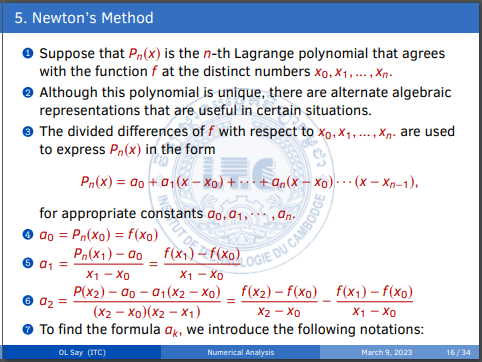 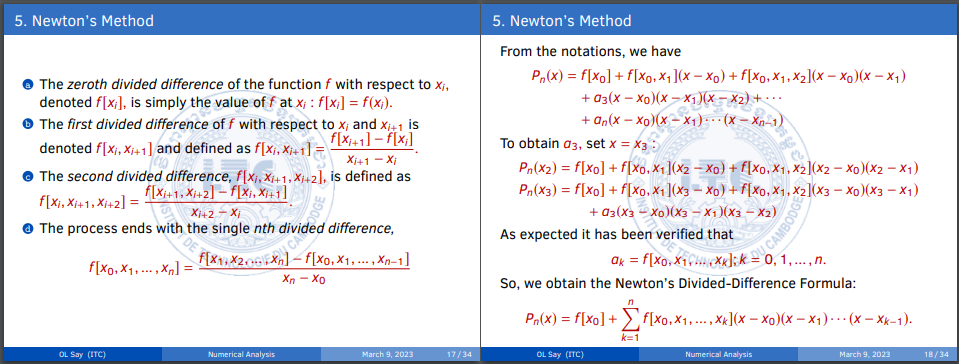
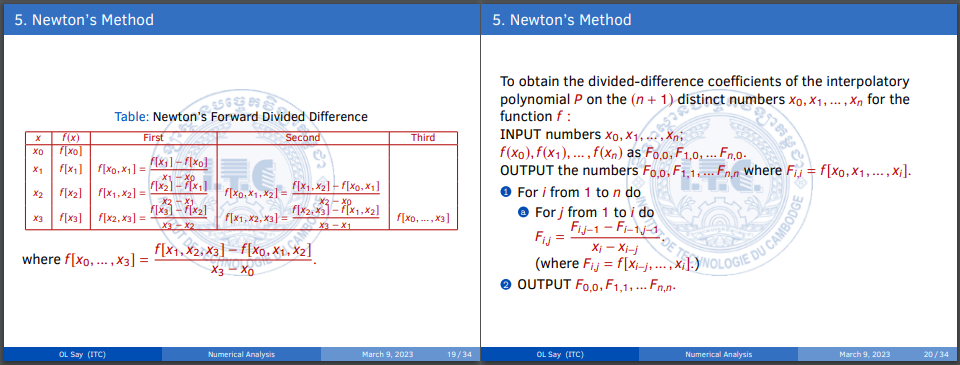 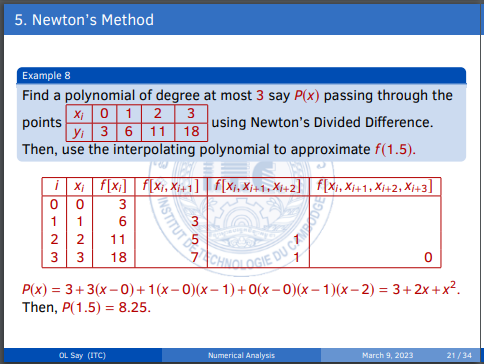

In [ ]:
import numpy as np
import pandas as pd

def NewtonDividedDifference(x: list[float], y: list[float]) -> tuple[list[float], pd.DataFrame]:
    N = len(x)
    F = np.empty(shape=(N, N))
    F.fill(np.nan)
    F[:, 0] = y
    for i in range(1, N, 1):
        I = i + 1
        for j in range(1, I, 1):
            F[i, j] = (F[i, j - 1] - F[i - 1, j - 1]) / (x[i] - x[i - j])
    b = [F[i, i] for i in range(N)]
    F = pd.DataFrame(data=F)
    F.insert(loc=0, column="x", value=x)
    return (b, F)

if __name__ == "__main__":
    x =[1.2,3.6,2.5]
    y = [2.4,3.8,2.6]
    c = NewtonDividedDifference(x=x, y=y)

In [ ]:
c

([2.4, 0.5833333333333333, 0.39044289044289027],
      x    0         1         2
 0  1.2  2.4       NaN       NaN
 1  3.6  3.8  0.583333       NaN
 2  2.5  2.6  1.090909  0.390443)

In [20]:
def EvaluateNewtonPolynomial(a: list[complex], c: list[complex], x: complex) -> complex:
    n = len(a) - 1
    p = a[n]
    start = n-1
    for k in range (start , -1, -1):
        p = a[k] + p * (x - c[k])
    return p

if __name__=="__main__":
    a=[0, 14, -4, 1]
    c = [2, -3, 1]
    x = 0
    p = EvaluateNewtonPolynomial(a=a, c=c, x=x)
    print(p)

2


### <font color = green|><b>V.) Neville's Method

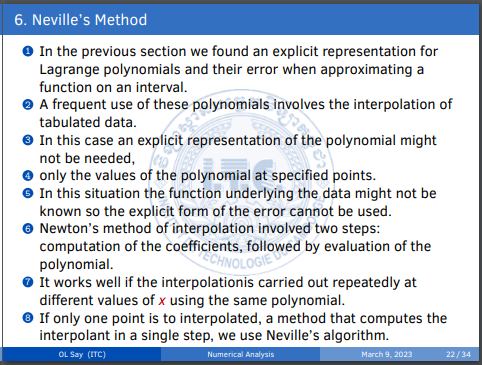 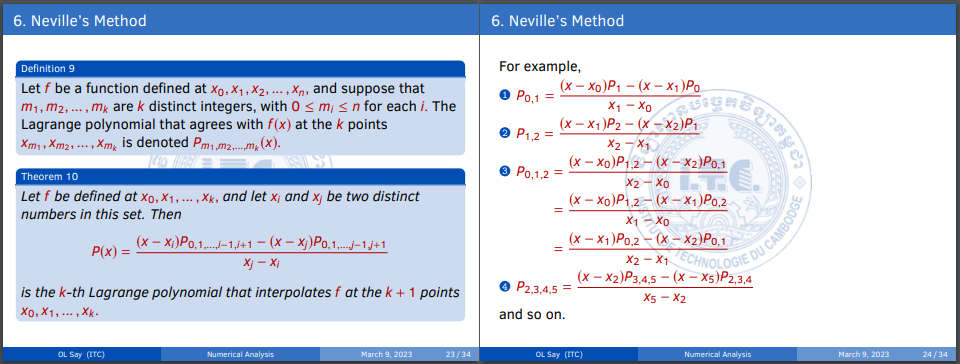 
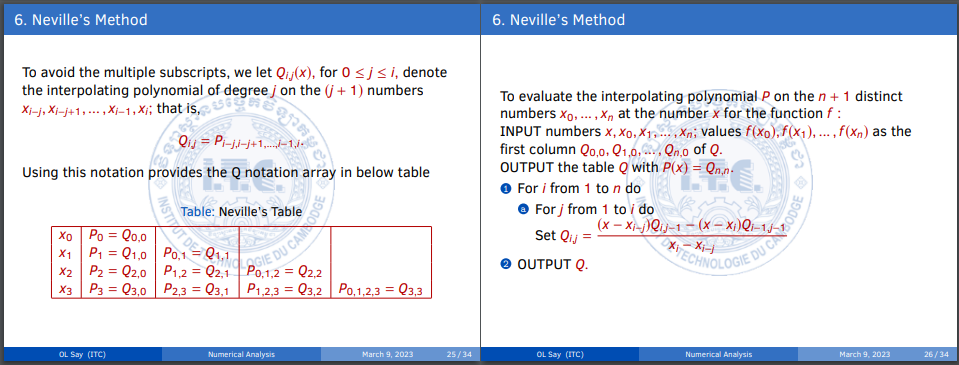 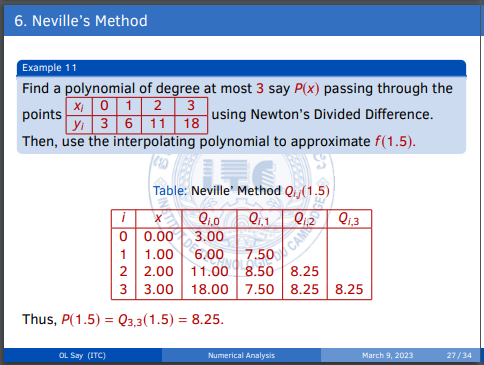

In [23]:
import pandas as pd
def NevilleInterpolation(x: list[float], y: list[float], x0: float) -> tuple[float, pd.DataFrame]:
    N = len(x)
    n = N - 1
    import numpy as np
    Q = np.empty(shape=(N, N))
    Q.fill(np.nan)
    Q[:,0] = y
    for i in range(1, N, 1):
        I = i + 1
        for j in range(1, I, 1):
            Q[i, j] = ((x0 - x[i-j]) * Q[i,j-1] - (x0-x[i]) * Q[i-1,j-1]) / (x[i]-x[i-j])
        p = Q[n,n]
        Q = pd.DataFrame(data=Q)
        Q.insert(loc=0, column="x", value=x)
        return(p,Q)

if __name__ == "__main__":
    x = [0,1,2,3]
    y = [3,6,11,8]
    x0 = 1.5
    p, Q = NevilleInterpolation(x=x, y=y, x0=x0)
    print(p)
    print(Q)

nan
   x     0    1   2   3
0  0   3.0  NaN NaN NaN
1  1   6.0  7.5 NaN NaN
2  2  11.0  NaN NaN NaN
3  3   8.0  NaN NaN NaN


### <b><font color = green|>VI.) Cubic Spline Interpolation

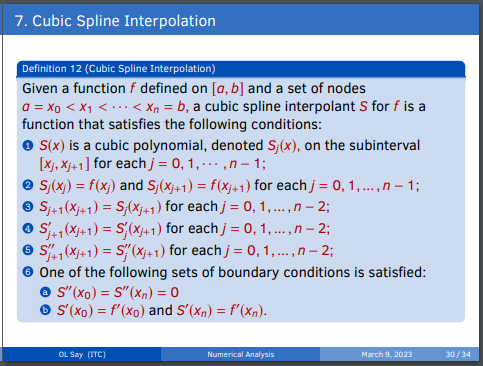 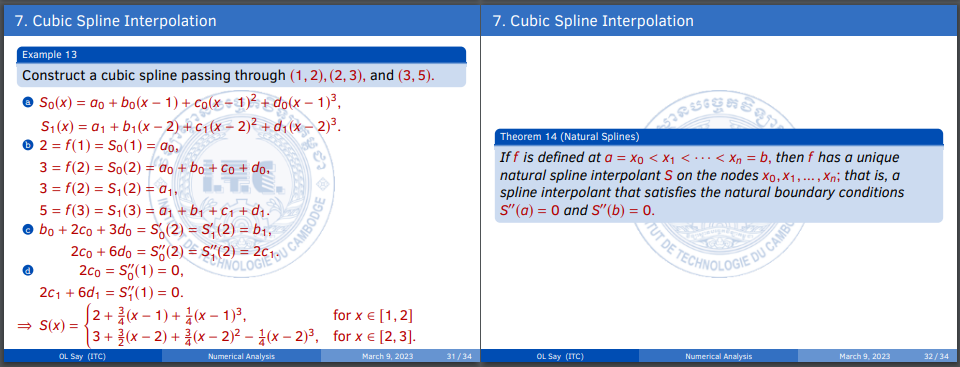 
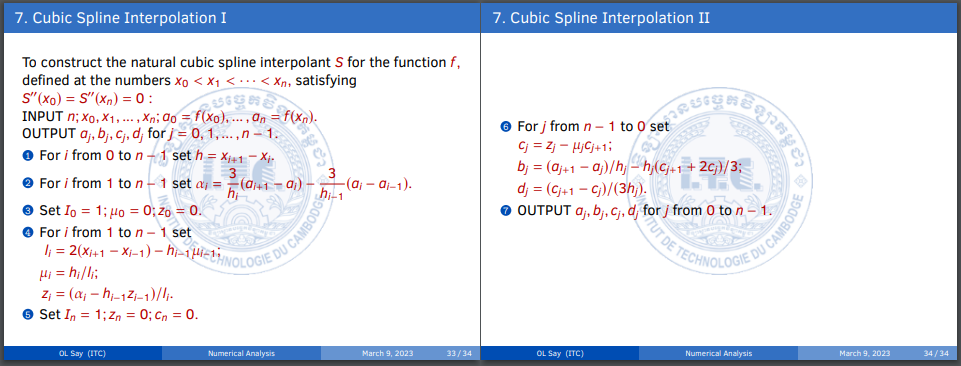

In [22]:
import pandas as pd
def NaturalCubicSpline(x: list[float], a: list[float]) -> pd.DataFrame:
    N = len(x)
    n = N - 1
    h = [0] * N
    al = [0] * N
    l = [0] * N
    mu = [0] * N
    z = [0] * N
    c = [0] * N
    b = [0] * N
    d = [0] * N
    
    for i in range(0, n, 1):
        h[i] = x[i+1] - x[i]
        
    for i in range(1, n, 1):
        al[i] = 3 * (a[i+1] - a[i]) / h[i] - 3 * (a[i] - a[i-1]) / h[i - 1]
        l[0] = 1
        mu[0] = 0
        z[0] = 0
        
    for i in range(1, n, 1):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (al[i] - h[i-1] * z[i-1]) / l[i]
        
    l[n] = 1
    z[n] = 0
    c[n] = 0
    
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1]+2*c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3*h[j])
        
    data = [a[:-1], b[:-1], c[:-1], d[:-1]]
    index = list('abcd')
    columns = [pd.Interval(left = x[i], right = x[i+1], closed = 'both') for i in range(len(x)-1)]
    df = pd.DataFrame(data=data, index=index, columns=columns).transpose()
    return df

if __name__ == "__main__":
    h = NaturalCubicSpline(x=[1,2,3,4],a=[5,6,7,8])
    print(h)

          a    b    c    d
[1, 2]  5.0  1.0  0.0  0.0
[2, 3]  6.0  1.0  0.0  0.0
[3, 4]  7.0  1.0  0.0  0.0


In [23]:

if __name__ == "__main__":
    h = NaturalCubicSpline(x=[-2,-1,0,1,2,3],a=[55,6,-3,-2,27,150])
    print(h)

             a          b          c          d
[-2, -1]  55.0 -59.086124   0.000000  10.086124
[-1, 0]    6.0 -28.827751  30.258373 -10.430622
[0, 1]    -3.0   0.397129  -1.033493   1.636364
[1, 2]    -2.0   3.239234   3.875598  21.885167
[2, 3]    27.0  76.645933  69.531100 -23.177033


In [24]:
def EvaluateCubicSpline(df: pd.DataFrame, x: float) -> float:
    n = len(df)
    index = df.index.values
    for k in range(0, n, 1):
        inter = index[k]
        if (x in inter):
            i = k
            break
    p = EvaluatePolynomial(a=df.iloc[i, :].to_list(), x=x - inter.left)
    return p

if __name__ == "__main__":
    df = NaturalCubicSpline(x=[1, 2, 3], a=[2, 3, 5])
    print(df)
    p = EvaluateCubicSpline(df=df, x=2.5)
    print(p)

          a     b     c     d
[1, 2]  2.0  0.75  0.00  0.25
[2, 3]  3.0  1.50  0.75 -0.25
3.90625


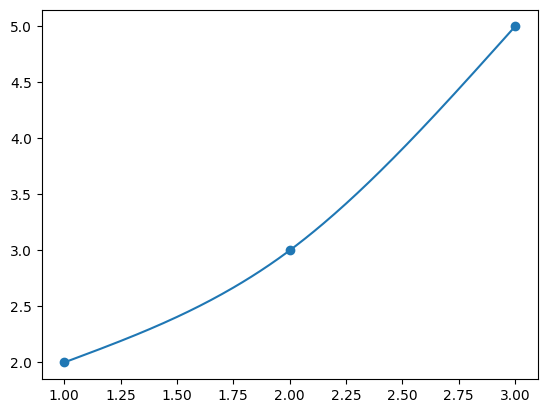

In [25]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure

def PlotCubicSpline(df: pd.DataFrame, aspect: str = "auto") -> tuple[Figure, Axes]:
    index = df.index.values
    n = len(df)
    x = [inter.right for inter in index]
    x = [index[0].left] + x
    y = [EvaluateCubicSpline(df=df, x=xi) for xi in x]
    x_range = x[n] - x[0]
    num = int(x_range / 0.01) + 1
    x_grid = np.linspace(start=x[0], stop=x[n], num=num)
    y_grid = [EvaluateCubicSpline(df, x=xi) for xi in x_grid]
    figure = plt.figure()
    axes = figure.add_subplot(111)
    axes.set_aspect(aspect=aspect)
    axes.plot(x_grid, y_grid)
    axes.scatter(x, y)
    return (figure, axes)

if __name__ == "__main__":
    df = NaturalCubicSpline(x=[1, 2, 3], a=[2, 3, 5])
    PlotCubicSpline(df=df)

In [26]:
x = [0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3]
y = [1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25]
df = NaturalCubicSpline(x=x,a=y)
print(df)

                 a         b         c         d
[0.9, 1.3]    1.30  0.539624  0.000000 -0.247649
[1.3, 1.9]    1.50  0.420752 -0.297179  0.946912
[1.9, 2.1]    1.85  1.086803  1.407263 -2.956382
[2.1, 2.6]    2.10  1.294942 -0.366567 -0.446635
[2.6, 3.0]    2.60  0.593399 -1.036519  0.445051
[3.0, 3.9]    2.70 -0.022191 -0.502457  0.174160
[3.9, 4.4]    2.40 -0.503406 -0.032226  0.078076
[4.4, 4.7]    2.15 -0.477075  0.084888  1.314171
[4.7, 5.0]    2.05 -0.071316  1.267642 -1.581219
[5.0, 6.0]    2.10  0.262340 -0.155455  0.043115
[6.0, 7.0]    2.25  0.080776 -0.026109 -0.004666
[7.0, 8.0]    2.30  0.014558 -0.040108 -0.024450
[8.0, 9.2]    2.25 -0.139008 -0.113458  0.017471
[9.2, 10.5]   1.95 -0.335834 -0.050564 -0.012728
[10.5, 11.3]  1.40 -0.531830 -0.100202 -0.020325
[11.3, 11.6]  0.90 -0.731178 -0.148983  1.213405
[11.6, 12.0]  0.70 -0.492949  0.943082 -0.839275
[12.0, 12.6]  0.60 -0.141335 -0.064048  0.036382
[12.6, 13.0]  0.50 -0.178900  0.001440 -0.447971
[13.0, 13.3]  0.40 -

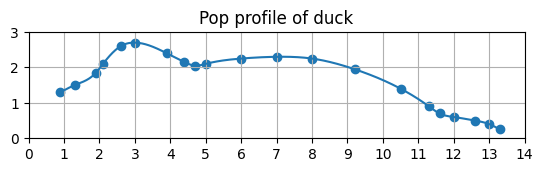

In [25]:
figure, axes = PlotCubicSpline(df=df,aspect=1)
axes.set_title('Pop profile of duck')
axes.grid(axis='both',which='both')
axes.set_xticks(range(0,15,1))
axes.set_yticks(range(0,4,1))
plt.show()

# <b><font color = green|><b><p style = 'text-align:center'>The End